In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['timesData.csv', 'cwurData.csv', 'shanghaiData.csv', 'school_and_country_table.csv', 'educational_attainment_supplementary_data.csv', 'education_expenditure_supplementary_data.csv']


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [9]:
data= pd.read_csv('../input/cwurData.csv')
data.info()
data.describe()
data.year.unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


array([2012, 2013, 2014, 2015])

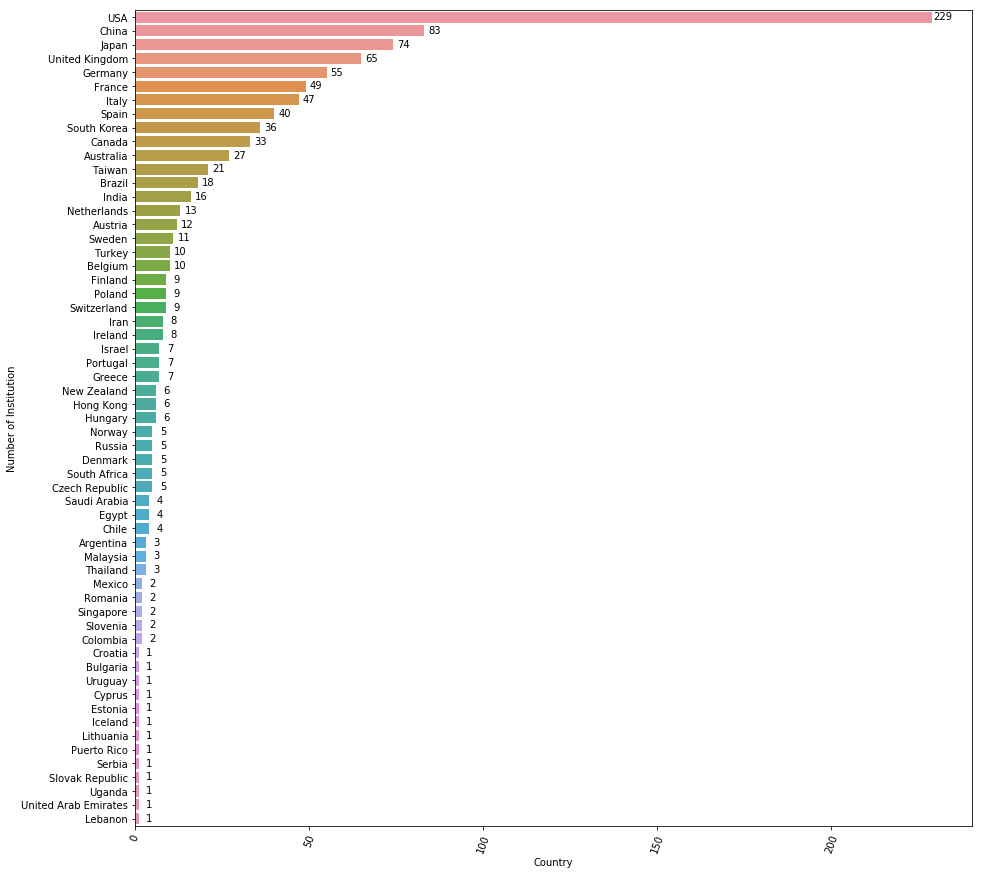

In [50]:
ins_count = data[data['year'] == 2015].groupby('country').size().sort_values(ascending = False)
plt.figure(figsize = (15,15))
ax = sns.barplot(x = ins_count.values, y = ins_count.index)
ax.set(xlabel = 'Country', ylabel = 'Number of Institution')
for i in ax.patches:
    ax.text(i.get_width()+3.0, i.get_y()+0.6,i.get_width().astype(int), color='black', ha="center")
plt.xticks(rotation = 70)
plt.show()

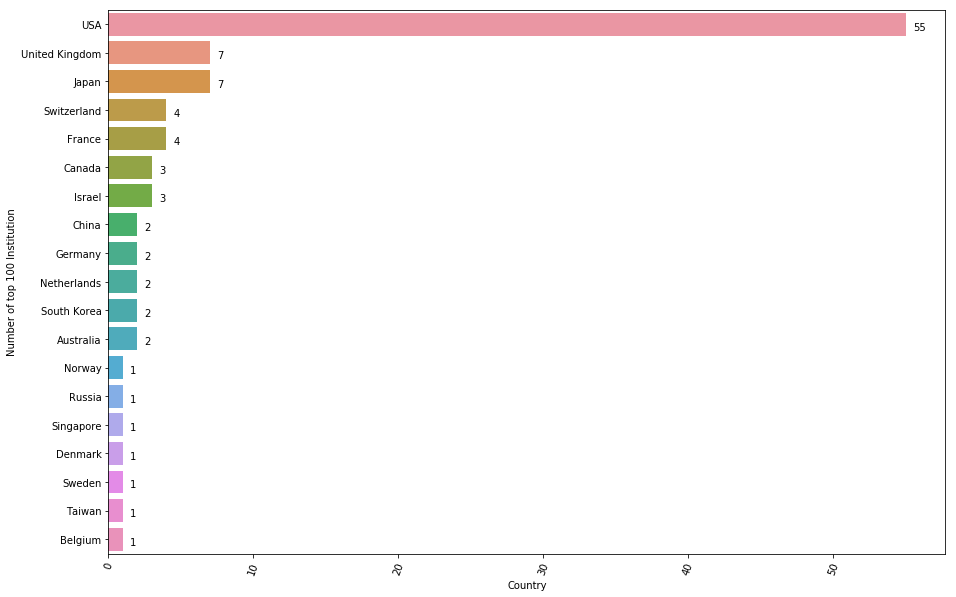

In [33]:
top_count = data[data['year'] == 2015].head(100).groupby('country').size().sort_values(ascending = False)
plt.figure(figsize = (15,10))
ax = sns.barplot(x = top_count.values, y = top_count.index)
ax.set(xlabel = 'Country', ylabel = 'Number of top 100 Institution')
for i in ax.patches:
    ax.text(i.get_width()+0.5, i.get_y()+0.6,i.get_width().astype(int))
plt.xticks(rotation = 70)
plt.show()

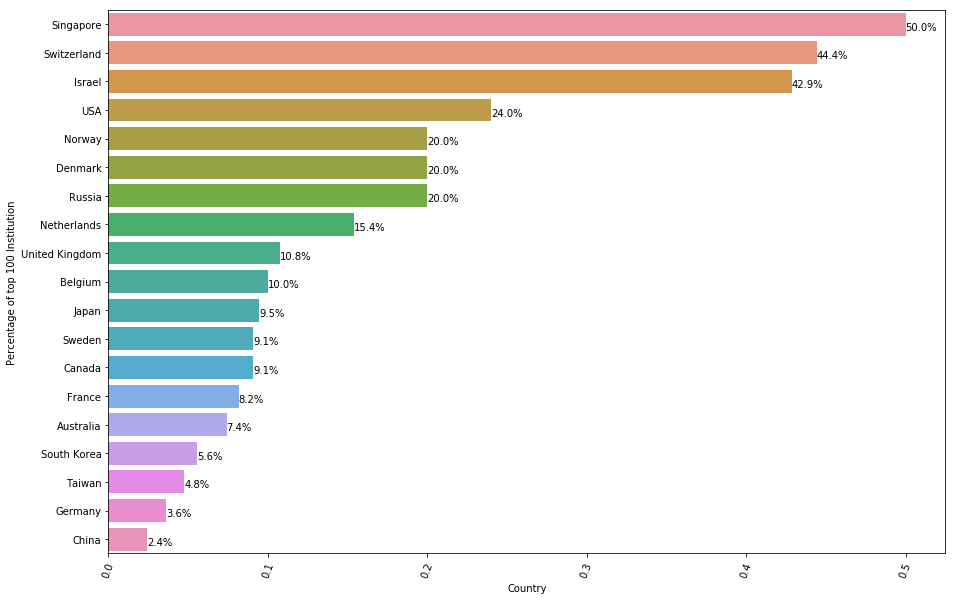

In [48]:
per_count = top_count/ins_count
per_count.dropna(inplace = True)
per_count.sort_values(ascending = False, inplace = True)
plt.figure(figsize = (15,10))
ax = sns.barplot(x = per_count.values, y = per_count.index)
ax.set(xlabel = 'Country', ylabel = 'Percentage of top 100 Institution')
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+0.6,str(round(i.get_width()*100,1))+'%')
plt.xticks(rotation = 70)
plt.show()

In [ ]:
# Identify Universities whose rank has been non-decreasing.

In [36]:
institution = list(data.institution.unique())
non_decreasing = pd.DataFrame(data=institution,columns=['institution'])
non_decreasing.head()

,institution
0,Harvard University
1,Massachusetts Institute of Technology
2,Stanford University
3,University of Cambridge
4,California Institute of Technology


In [49]:
def non_decreasing_rank(institution):
    world_rank = list(data[data.institution == institution]['world_rank'])
    count = data.groupby('institution').size()[institution]
    for i in range(1,count): #1,2,3
        if world_rank[i-1] < world_rank[i]:
            return False
    return True
non_decreasing[non_decreasing['institution'].apply(non_decreasing_rank) == True]

,institution
0,Harvard University
2,Stanford University
8,Columbia University
9,"University of California, Berkeley"
10,University of Chicago
13,University of Tokyo
18,"University of California, Los Angeles"
30,University College London
32,Northwestern University
33,"University of Michigan, Ann Arbor"


In [38]:
rank2015 = data[data.year == 2015]
rank2015.drop(['country','national_rank','year','broad_impact'],axis = 1, inplace = True)
rank2015.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,world_rank,institution,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
1200,1,Harvard University,1,1,1,1,1,1,3,100.00
1201,2,Stanford University,9,2,4,5,3,3,10,98.66
1202,3,Massachusetts Institute of Technology,3,11,2,15,2,2,1,97.54
1203,4,University of Cambridge,2,10,5,11,6,12,48,96.81
1204,5,University of Oxford,7,13,10,7,12,7,15,96.46


In [39]:
y = rank2015.quality_of_education.max() + 1

In [40]:
factor = list(rank2015.columns.values)[2:9]
factor

['quality_of_education',
 'alumni_employment',
 'quality_of_faculty',
 'publications',
 'influence',
 'citations',
 'patents']

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


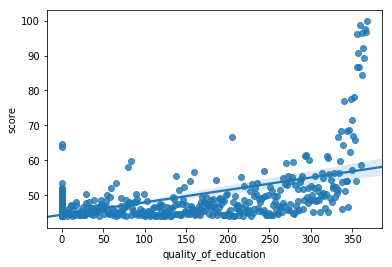

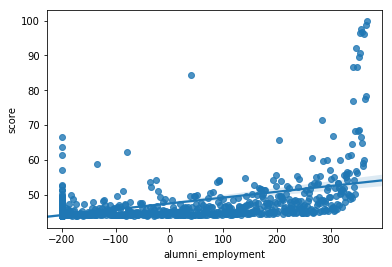

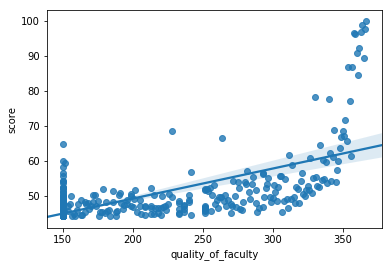

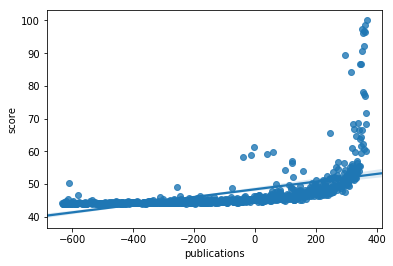

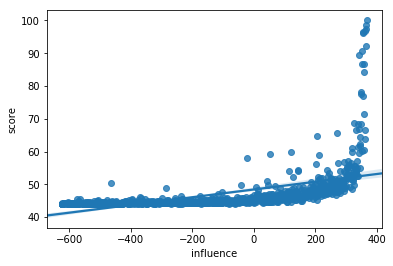

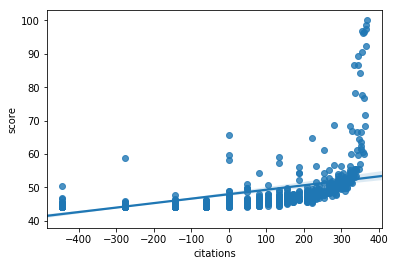

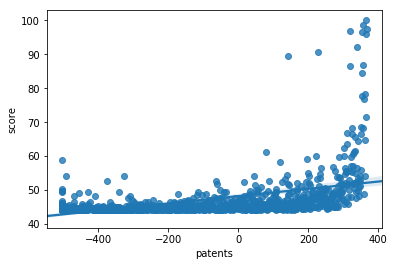

In [41]:
for i in range(len(factor)):
    z = rank2015[factor[i]].apply(lambda x:y-x)
    plt.figure(i)
    sns.regplot(x=z, y='score', data = rank2015)

In [42]:
cor = pd.DataFrame()
for i in range(len(factor)):
    cor[factor[i]] = rank2015[factor[i]].apply(lambda x:y-x)
cor['score'] = rank2015.score
cor.corr() 

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
quality_of_education,1.000000,0.473653,0.685989,0.521378,0.549574,0.521067,0.386652,0.595771
alumni_employment,0.473653,1.000000,0.390605,0.476797,0.418218,0.449119,0.398035,0.480756
quality_of_faculty,0.685989,0.390605,1.000000,0.537166,0.570487,0.559989,0.418088,0.708048
publications,0.521378,0.476797,0.537166,1.000000,0.845110,0.788885,0.616911,0.521738
influence,0.549574,0.418218,0.570487,0.845110,1.000000,0.808917,0.548654,0.522732
citations,0.521067,0.449119,0.559989,0.788885,0.808917,1.000000,0.518144,0.517301
patents,0.386652,0.398035,0.418088,0.616911,0.548654,0.518144,1.000000,0.454706
score,0.595771,0.480756,0.708048,0.521738,0.522732,0.517301,0.454706,1.000000


In [43]:
score = data.score
train = data[factor] 
lab_enc = preprocessing.LabelEncoder()
score_encoded = lab_enc.fit_transform(score)
x_train, y_train, x_test, y_test = train_test_split(train,score_encoded,train_size = 0.9, random_state = 0)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


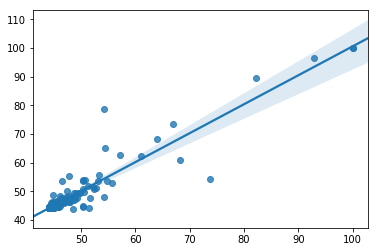

In [44]:
tree = DecisionTreeClassifier()
tree.fit(x_train,x_test)
y_pred = tree.predict(y_train)
y1 = lab_enc.inverse_transform(y_test)
y2 = lab_enc.inverse_transform(y_pred)
np.corrcoef(y1,y2)
sns.regplot(y1,y2)

In [45]:
fit = 0
for i in range(len(y1)):
    if (y1[i] - 0.5) <= y2[i] <= (y1[i] + 0.5):
        fit = fit + 1
        
print(fit/len(y1))


0.6045454545454545


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


array([[1.        , 0.96049595],
       [0.96049595, 1.        ]])

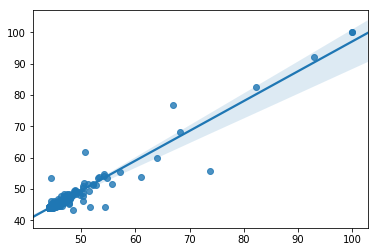

In [46]:
forest = RandomForestClassifier()
forest.fit(x_train,x_test)
y_pred = forest.predict(y_train)
y1 = lab_enc.inverse_transform(y_test)
y2 = lab_enc.inverse_transform(y_pred)
sns.regplot(y1,y2)
np.corrcoef(y1,y2)

In [47]:
fit = 0
for i in range(len(y1)):
    if (y1[i] - 0.5) <= y2[i] <= (y1[i] + 0.5):
        fit = fit + 1
        
print(fit/len(y1))

0.6045454545454545
